### Problem Description

We're given a dataset of an e-commerce company which sells clothes on-line, via website and mobile app. We're asked to predict how much money will a customer spend on a yearly basis, given the relevant data. Also, we want to see wheather doing transactions over website or app has bigger impact on customers' behaviour. 

### The Approach

This project consists of the following steps:
1. Performing an exploratory data analysis by visualizing the data
2. Implementing linear regression to make predictions
3. Building a simpler model using backward elimination

### EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

First, we import and explore the data.

In [2]:
df_o = pd.read_csv('..\Ecommerce Customers')
df_o.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


We also want to make sure that we don't have any missing values.

In [3]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 25.5+ KB


For this analysis, only the numerical values are importan to us; so we kick out the non-numerical values.

In [4]:
df = df_o[df_o.columns[df_o.dtypes != object]]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.6 KB


Now we do some exploratory data analysis. 

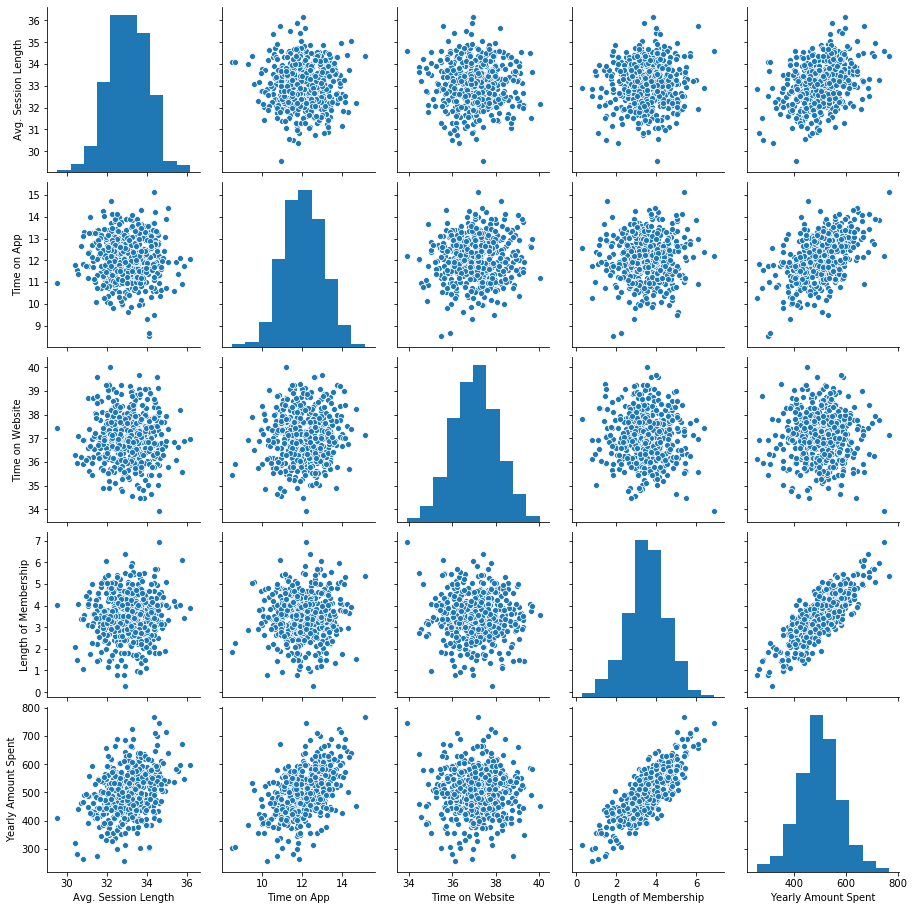

In [6]:
sns.pairplot(df)

We can see a strong correlation between length of membership and money spent on a yearly basis. Also, we notice there's some correlation between time spent on the mobile app and money spent. Interestingly, it seems that time spent on website does not influence the money spent. Let's explore these correlations a bit more, using a heatmap.

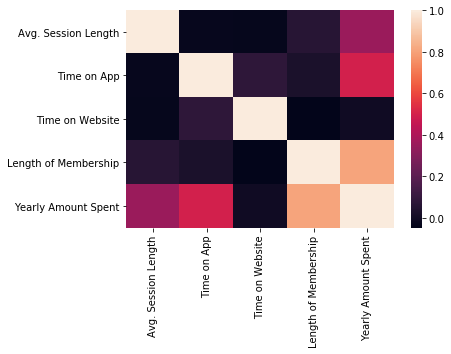

In [7]:
sns.heatmap(df.corr())

As we noticed, there is a considerable correlation betwen length of membership and money spent. The correlation between time on app and money spent is lesser, but still significant. The correlation between time on the website and money spent, not so. Now we'll explore these correlations using more interactive visualizations.

In [8]:
import plotly as ply
import cufflinks as cf

ply.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [9]:
df.iplot(x = 'Length of Membership', y = 'Yearly Amount Spent', kind = 'scatter', mode = 'markers')

In [10]:
df.iplot(x = 'Time on App', y = 'Yearly Amount Spent', kind = 'scatter', mode = 'markers')

In [11]:
df.iplot(x = 'Time on Website', y = 'Yearly Amount Spent', kind = 'scatter', mode = 'markers')

### Linear Regression Implementation

We now want to train a machine learning model in order to produce predictions based on a given data. We'll use linear regression. We'll use money spent as a dependent variable, and the rest as independent variables.

In [12]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We check how well our model performs on a test set using accuracy score; we also preform cross validetion to make sure that our model performs well.

In [15]:
regressor.score(X_test,y_test)

0.9810343753750352

In [16]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(estimator = regressor,
                           X = X,y = y, cv = 10)
print(np.mean(cv_score))

0.9825492707486994


We can extract the coefficients of our linear regression model, to see how our independent variables influence the money spent.

In [17]:
coeff = pd.DataFrame(regressor.coef_, df.columns[:-1], columns = ['Coeff.'])
coeff

,Coeff.
Avg. Session Length,25.074145
Time on App,38.936841
Time on Website,0.470579
Length of Membership,61.573302


We can now build a function which will predict new values given our custom data.

In [18]:
def prediction():
    
    avg_session = float(input('Insert average session time'))
    app_time = float(input('Insert app time'))
    web_time = float(input('Insert web time'))
    membership = float(input('Insert membership time'))
    new_val = [avg_session,app_time,web_time,membership]
    new_val = np.array(new_val).reshape(1,-1)
    
    print(regressor.predict(new_val))

In [19]:
prediction()

Insert average session time34
Insert app time14
Insert web time38
Insert membership time5
[689.36131244]


### Backward Elimination

We can also use backward elimination to predict the money spent, while omitting variables that are statistically not significant.

In [20]:
X = np.hstack((np.ones((500,1)),X))

In [21]:
X_opt = X[: , [0,1,2,3,4]]

In [22]:
import statsmodels.regression.linear_model as stat
regressor_OLS = stat.OLS(endog = y, exog = X_opt).fit()

In [23]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     7766.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:46:39   Log-Likelihood:                -1856.9
No. Observations:                 500   AIC:                             3724.
Df Residuals:                     495   BIC:                             3745.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1051.5943     22.993    -45.736      0.000   -1096.769   -1006.419
x1            25.7343      0.451     57.057      0.000      24.848      26.620
x2            38.7092      0.451     85.828      0.000      37.823      39.595
x3             0.4367      0.444      0.983      0.326      -0.436       1.309
x4            61.5773      0.448    137.346      0.000      60.696      62.458
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                     2.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the p-values column, we see that Time on Website variable is not statistically significant, so we can omit it.

In [24]:
X_opt = X[:,[0,1,2,4]]
regressor_OLS = stat.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.036e+04
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:46:49   Log-Likelihood:                -1857.4
No. Observations:                 500   AIC:                             3723.
Df Residuals:                     496   BIC:                             3740.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1035.3396     15.983    -64.778      0.000   -1066.742   -1003.937
x1            25.7210      0.451     57.055      0.000      24.835      26.607
x2            38.7460      0.449     86.210      0.000      37.863      39.629
x3            61.5560      0.448    137.464      0.000      60.676      62.436
==============================================================================
Omnibus:                        0.248   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.136
Skew:                          -0.027   Prob(JB):                        0.934
Kurtosis:                       3.060   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All the remaining variables are statistically significant. We can now build a linear regressor that predicts the money spent, based on relevant predictors.

In [25]:
def prediction_OLS():
    
    avg_session = float(input('Insert average session time'))
    app_time = float(input('Insert app time'))
    membership = float(input('Insert membership time'))
    new_val = [1,avg_session,app_time,membership]

    
    print(regressor_OLS.predict(new_val))

In [26]:
prediction_OLS()

Insert average session time34
Insert app time14
Insert membership time5
[689.39943432]


### Conclusions

Comparing the results from both models, we can see that time spent on web won't significantly influence the money spent, so we can focus more on app developement and marketing. 